<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)
Aluno: Fabio Pereira

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'

fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')

<ipython-input-4-89fd5b45caf4>:7: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(open('estados-bruto.xml', mode='r'), 'lxml')


In [ ]:
# visualize os resultados

print(fonte)

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados
#extraindo os estados do arquivo
lista_estados = list()
for linha in fonte.find_all('nome'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  lista_estados.append(texto_coluna)
#extraindo  siglas do estados
sigla_extraidos = list()
for linha in fonte.find_all('sigla'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  sigla_extraidos.append(texto_coluna)
#extraindo a regiao dos estados
regiao_extraida = list()
for linha in fonte.find_all('regiao'):
  texto_coluna = linha.get_text().strip().split(sep='\n')
  regiao_extraida.append(texto_coluna)


estados = list()
for itens in estados_extraidos:
  estados.append(itens[0])

sigla_estado = list()
for itens in sigla_extraidos:
  sigla_estado.append(itens[0])

regiao_estado = list()
for itens in regiao_extraida:
  regiao_estado.append(itens[0])

In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;
#salvando os dados em um arquivo csv separado por ';'
import csv
with open(file='./estados-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado', 'sigla', 'regiao']] + list(map(lambda estado, sigla, regiao: [estado, sigla, regiao], estados, sigla_estado, regiao_estado)))


NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv
from pickleshare import PickleShareDB
estado = None
cidades = None
populacao = None
pib = None
pib_percapita = None

with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('UF')
  saldos = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)

  indice_saldo = cabecalho.index('nome')
  saldos2 = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('Pop_est_2009')
  populacao = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('PIB')
  pib = [linha[indice_saldo] for linha in leitor_csv_iter]
with open(file='./cidades-bruto.csv', mode='r', encoding='utf8') as arquivo:
  leitor_csv_iter = csv.reader(arquivo, delimiter=',')
  cabecalho = next(leitor_csv_iter)
  indice_saldo = cabecalho.index('PIB_percapita')
  pib_percapita = [linha[indice_saldo] for linha in leitor_csv_iter]
# visualize os resultados
print(saldos)
print(saldos2)
print(populacao)
print(pib)
print(pib_percapita)





['BAHIA', 'RIO GRANDE DO SUL', 'ESPIRITO SANTO', 'MINAS GERAIS', 'PIAUÍ', 'MINAS GERAIS', 'PIAUÍ', 'PIAUÍ', 'GOIÁS', 'PERNAMBUCO', 'PARÁ', 'PERNAMBUCO', 'RIO GRANDE DO SUL', 'SERGIPE', 'SÃO PAULO', 'PARAÍBA', 'TOCANTINS', 'MINAS GERAIS', 'PARAÍBA', 'AMAZONAS', 'TOCANTINS', 'SÃO PAULO', 'SANTA CATARINA', 'MINAS GERAIS', 'MINAS GERAIS', 'BAHIA', 'CEARÁ', 'RORAIMA', 'RIO GRANDE DO SUL', 'PERNAMBUCO', 'PIAUÍ', 'MARANHÃO', 'RIO DE JANEIRO', 'MINAS GERAIS', 'RIO GRANDE DO SUL', 'PERNAMBUCO', 'BAHIA', 'PARAÍBA', 'PARAÍBA', 'MATO GROSSO', 'MINAS GERAIS', 'PARÁ', 'BAHIA', 'PIAUÍ', 'GOIÁS', 'PARAÍBA', 'BAHIA', 'TOCANTINS', 'MINAS GERAIS', 'TOCANTINS', 'PARAÍBA', 'SÃO PAULO', 'RIO GRANDE DO SUL', 'PARANÁ', 'BAHIA', 'SANTA CATARINA', 'PARÁ', 'BAHIA', 'PERNAMBUCO', 'SERGIPE', 'PARANÁ', 'MATO GROSSO', 'PARAÍBA', 'MATO GROSSO', 'MARANHÃO', 'SÃO PAULO', 'GOIÁS', 'PARAÍBA', 'PERNAMBUCO', 'ALAGOAS', 'MATO GROSSO DO SUL', 'MINAS GERAIS', 'MATO GROSSO', 'PARÁ', 'RIO DE JANEIRO', 'ALAGOAS', 'CEARÁ', 'BAHIA

In [ ]:
import csv
with open(file='./cidades-limpo.csv', mode='w', encoding='utf8') as arquivo:
  escritor_csv = csv.writer(arquivo, delimiter=';')
  escritor_csv.writerows([['estado', 'cidade', 'populacao', 'pib', 'pib_percapita']] + list(map(lambda estado, cidade, populacao, pib, pib_percapita: [estado, cidade, populacao, pib, pib_percapita], saldos, saldos2, populacao, pib, pib_percapita)))



In [ ]:
# manipule os dados
import pandas as pd

cidades_df = pd.read_csv('cidades-limpo.csv', delimiter=';')


In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

cidades_df.head(n=10)

,estado,cidade,populacao,pib,pib_percapita
0,BAHIA,Tremedal,18433,5.788399e+04,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4000,4.572388e+04,11430.969727
2,ESPIRITO SANTO,Vitória,320156,1.978263e+07,61790.589844
3,MINAS GERAIS,Jacutinga,21424,2.478160e+05,11567.209961
4,PIAUÍ,Nazária,7895,2.095138e+04,2653.750000
5,MINAS GERAIS,Pedra Azul,26000,1.875237e+05,7212.450195
6,PIAUÍ,Teresina,802537,8.700461e+06,10841.200195
7,PIAUÍ,Amarante,17892,6.532289e+04,3650.949951
8,GOIÁS,Matrinchã,4420,4.591055e+04,10387.000000
9,PERNAMBUCO,Cachoeirinha,18123,8.043380e+04,4438.220215


In [ ]:
cidades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   estado         1233 non-null   object 
 1   cidade         1233 non-null   object 
 2   populacao      1233 non-null   int64  
 3   pib            1233 non-null   float64
 4   pib_percapita  1233 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 48.3+ KB


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3
estados_df = pd.read_csv('estados-limpo.csv', delimiter=';')

In [ ]:
estados_df.head()

,estado,sigla,regiao
0,ACRE,AC,NORTE
1,ALAGOAS,AL,NORDESTE
2,AMAPA,AP,NORTE
3,AMAZONAS,AM,NORTE
4,BAHIA,BA,NORDESTE


In [ ]:
pd.concat([cidades_df[['estado']], estados_df[['estado']]])

,estado
0,BAHIA
1,RIO GRANDE DO SUL
2,ESPIRITO SANTO
3,MINAS GERAIS
4,PIAUÍ
...,...
22,SANTA CATARINA
23,SAO PAULO
24,SERGIPE
25,TOCANTINS


In [ ]:
brasil_csv = pd.merge(left=cidades_df, right=estados_df, on='estado', how='outer')

---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
brasil_csv.to_csv('brasil.csv')

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
brasil_csv.nlargest(10, 'populacao')[['cidade', 'populacao']]

,cidade,populacao
1017,Rio de Janeiro,6186710.0
44,Salvador,2998056.0
840,Manaus,1738641.0
189,Porto Alegre,1436123.0
529,Goiânia,1281975.0
718,São Bernardo do Campo,810979.0
420,Teresina,802537.0
724,Santo André,673396.0
24,Feira de Santana,591707.0
661,Ribeirão Preto,563107.0


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
df_nordeste = (brasil_csv.loc[brasil_csv['regiao'] == 'NORDESTE'])
df_nordeste.nsmallest(5, ['pib_percapita'])[['cidade', 'pib_percapita']]

,cidade,pib_percapita
69,Lamarão,2327.149902
1148,Senador Rui Palmeira,2687.409912
51,Souto Soares,2772.199951
1150,Mata Grande,2792.679932
13,Nordestina,2798.449951


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
df_saopaulo = (brasil_csv.loc[brasil_csv['estado'] == 'SÃO PAULO'])
df_saopaulo.nlargest(15, ['pib'])[['cidade', 'pib']]

,cidade,pib
718,São Bernardo do Campo,28935768.00
675,Santos,22546134.00
724,Santo André,14709603.00
661,Ribeirão Preto,14688064.00
731,São José do Rio Preto,7879047.50
654,Mauá,6574846.50
696,Limeira,5752286.00
728,Matão,5187325.00
671,Hortolândia,4855737.50
698,Rio Claro,4522812.50


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
df_sc = (brasil_csv.loc[brasil_csv['estado'] == 'SANTA CATARINA'])
soma = df_sc['pib'].sum()
display(soma)

18711849.630859368

 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
df_populacao_sul = (brasil_csv.loc[brasil_csv['regiao'] == 'SUL'])
soma_populacao = df_populacao_sul['populacao'].sum()
display(f'A populacaço da regiao sul é de {soma_populacao}')

'A populacaço da regiao sul é de 4447970.0'

 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
pib_ms = (brasil_csv.loc[brasil_csv['estado'] == 'MATO GROSSO DO SUL'])
pib_medio = pib_ms['pib_percapita'].sum() / 8
print(pib_medio)

29033.252319335


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
populacao_brasil = brasil_csv['populacao'].sum()
display(populacao_brasil)

48369680.0

### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

<Figure size 1000x600 with 0 Axes>

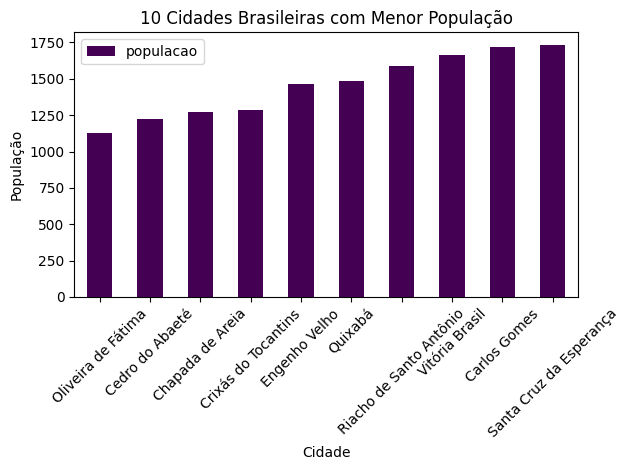

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 'brasil_csv' é o dataframe usado para extração de dados
cidades_min = brasil_csv.nsmallest(10, 'populacao')[['cidade', 'populacao']]

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário
cidades_min.plot.bar(x='cidade', y='populacao', colormap='viridis')

# Personalizando o gráfico
plt.title('10 Cidades Brasileiras com Menor População')
plt.xlabel('Cidade')
plt.ylabel('População')
plt.xticks(rotation=45)  # Rotação dos nomes das cidades no eixo X para melhor legibilidade
plt.tight_layout()

# Exibindo o gráfico
plt.show()


 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

<Axes: ylabel='populacao'>

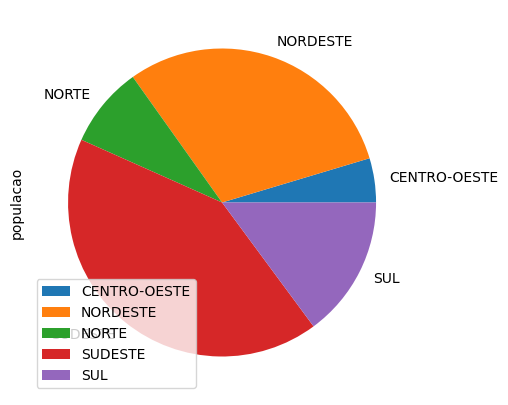

In [ ]:
# código para gerar a visualização
brasil_csv[['regiao', 'populacao']].groupby('regiao').agg('sum').plot.pie(y='populacao', figsize=(5,5))